<a href="https://colab.research.google.com/github/TheCodingCvrlo/TheCodingCvrlo/blob/main/filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carlo Antonio Patti, 3134395
### Bocconi University, May 2023
A notebook written in fulfillment of the requirements for the Degree of Bachelor of Science in Economics, Management and Computer Science


In [ ]:
#@title Drive Mount
from google.colab import drive
drive.mount("drive", force_remount = True)

Mounted at drive


In [ ]:

#@title Imports
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import pickle


#viz
import matplotlib.pyplot as plt
import seaborn as sns

#pytorch default imports
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
from torch.utils.data import Subset
from copy import deepcopy as cp


In [ ]:
 pip install -U kaleido --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00


In [ ]:
PATH_REPS = "drive//MyDrive//thesis//data//representations.csv"
PATH_FLAGS = "drive//MyDrive//thesis//data//flags//duplicate_flags.csv"

In [ ]:
df = pd.read_csv(PATH_REPS, index_col=0)
df['dupe_flag'] = pd.read_csv(PATH_FLAGS).to_numpy()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4794,4795,4796,4797,4798,4799,artist,title,label,dupe_flag
0,0.186423,0.054104,0.008338,0.298508,0.091317,0.562892,0.388584,0.447985,0.114253,0.373992,...,0.380661,1.325894,0.153884,0.247429,-0.296933,0.205336,10cc,Les Nouveaux Riches,0,0
1,0.534583,0.519039,0.695587,0.154432,0.064010,1.019466,0.030198,0.300727,0.397662,0.841016,...,1.072348,0.070084,0.784932,0.616306,-0.529404,0.266855,10cc,Listen With Your Eyes,0,1
2,-0.747218,-0.241643,0.208596,1.021109,0.895446,0.872237,-0.425431,0.614996,0.647687,1.499447,...,0.654247,1.167712,0.773478,0.788219,0.957022,0.501419,10cc,Lying Here With You,0,0
3,1.179623,0.771975,1.277992,1.298771,0.160453,0.788011,0.705584,0.370067,0.660782,0.227609,...,0.139103,0.090255,0.274278,-0.598995,0.593601,0.395094,10cc,Margo Wants The Mustard,0,0
4,0.867722,0.077910,1.006646,0.811348,0.138325,1.092275,0.551503,0.547705,0.588275,0.629261,...,0.952863,0.904875,0.933412,0.469439,0.275433,-0.241763,10cc,Memories - U.S. Mix,0,0


In [ ]:
df_unique = cp(df[df.dupe_flag == 0]) #filter out duplicate entries

# Build Query for Spotify API

In [ ]:
save_query = False #@param
PATH_QUERY = "pqueries//album-query.txt"

df_unique[['artist', 'title']]
query = [f'{i.replace(" ", "+")}+artist:{j.replace(" ", "+")}' for i,j in zip(list(df_unique.title), list(df_unique.artist))]

if save_query:
  with open(PATH_QUERY, "w") as file:
    for entry in query:
      file.write(entry+"\n")

see bash scripts, album is extracted from each artist/title pair

In [ ]:
#safety check
# with open(PATH_QUERY, "r") as file:
#   qq = file.read()
#   qq = qq.splitlines()

# assert len(query)==len(qq)

# Integrate Query Results

In [ ]:
import json

PATH_RESULTS = "drive//MyDrive//thesis//data//queries//results"
PATH_JSON = PATH_RESULTS +f'//albums-full.json'


# Opening JSON file
with open(PATH_JSON) as json_file:
  data = json.load(json_file)


# data = {k: data[k].split for k in data.keys()}
# data = {k: [g.strip() for g in data[k]] for k in data.keys()}
# genres_future = data['Future']
# genres_future

In [ ]:
keys = [i for i in data.keys()]
albums = [i for i in data.values()]

In [ ]:
songs = [i.split('artist:')[0].replace("+", " ").strip() for i in data.keys()]
artists = [i.split('artist:')[1].replace("+", " ").strip() for i in data.keys()]

In [ ]:
df_albums = pd.DataFrame()
df_albums['title'] = songs
df_albums['artist'] = artists
df_albums['album'] = albums

In [ ]:
df_albums.sort_values(['artist', 'title'], inplace=True)
df_albums.head(20)

,title,artist,album
252,24 Hours - Full Version,10cc,Windows In The Jungle (Re-Presents)
470,4% Of Something,10cc,null
469,Action Man In Motown Suit,10cc,Ten Out Of 10
506,Age Of Consent,10cc,Anthology
703,Bee In My Bonnet,10cc,Tenology
251,Charity Begins At Home,10cc,Meanwhile
773,City Lights,10cc,Windows In The Jungle (Re-Presents)
943,Code Of Silence,10cc,Anthology
937,Don't Turn Me Away,10cc,Ten Out Of 10
122,Donna,10cc,Tenology


In [ ]:
df_unique.sort_values(['artist', 'title'])[df_unique.artist == '10cc'][['artist', 'title']]

<ipython-input-14-2db2b650225c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_unique.sort_values(['artist', 'title'])[df_unique.artist == '10cc'][['artist', 'title']]


,artist,title
34,10cc,24 Hours - Full Version
35,10cc,4% Of Something
36,10cc,Action Man In Motown Suit
37,10cc,Age Of Consent
38,10cc,Bee In My Bonnet
39,10cc,Charity Begins At Home
40,10cc,City Lights
41,10cc,Code Of Silence
44,10cc,Don't Turn Me Away
45,10cc,Donna


In [ ]:
df_merged = pd.merge(df_unique, df_albums, how='left', on=['artist', 'title'])
df_merged.head()

,0,1,2,3,4,5,6,7,8,9,...,4795,4796,4797,4798,4799,artist,title,label,dupe_flag,album
0,0.186423,0.054104,0.008338,0.298508,0.091317,0.562892,0.388584,0.447985,0.114253,0.373992,...,1.325894,0.153884,0.247429,-0.296933,0.205336,10cc,Les Nouveaux Riches,0,0,Ten Out Of 10
1,-0.747218,-0.241643,0.208596,1.021109,0.895446,0.872237,-0.425431,0.614996,0.647687,1.499447,...,1.167712,0.773478,0.788219,0.957022,0.501419,10cc,Lying Here With You,0,0,Ten Out Of 10
2,1.179623,0.771975,1.277992,1.298771,0.160453,0.788011,0.705584,0.370067,0.660782,0.227609,...,0.090255,0.274278,-0.598995,0.593601,0.395094,10cc,Margo Wants The Mustard,0,0,Anthology
3,0.867722,0.077910,1.006646,0.811348,0.138325,1.092275,0.551503,0.547705,0.588275,0.629261,...,0.904875,0.933412,0.469439,0.275433,-0.241763,10cc,Memories - U.S. Mix,0,0,Ten Out Of 10
4,0.523444,0.118580,0.372934,0.318150,0.206272,0.892266,0.417515,0.773280,0.336966,0.607854,...,1.201806,0.763817,0.522419,0.512771,0.308673,10cc,Memories,0,0,Ten Out Of 10


In [ ]:
df_merged.shape, df_unique.shape, df_albums.shape

((13981, 4805), (13981, 4804), (13908, 3))

In [ ]:
df_merged['album'].replace(np.nan, "null", inplace=True)

In [ ]:
sum(list(df_merged.album.isna()))

0

In [ ]:
df_grouped = df_merged.groupby(['artist'])[['album']].nunique()

In [ ]:
df_grouped[df_grouped.album == 1]

,album
artist,
A Band Of Boys,1
A Boy Called Joni,1
A&G,1
Aarian Pope,1
Aaron Lewis,1
...,...
Leonid Rudenko,1
Lesley Gore,1
Leslie Odom Jr,1


In [ ]:
df_grouped.shape

(589, 1)

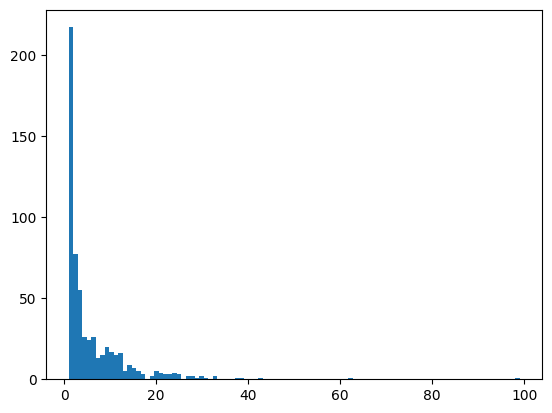

In [ ]:
plt.hist(df_grouped.album, bins=100)
plt.show()

# Filter based on number of songs, different thresholds

In [ ]:
def make_ftab(df, levels=[1,10,30,40,60,80,100]):

  labels = np.array(df.label.values)

  vals, freqs = np.unique(labels, return_counts=True)

  out = pd.DataFrame(levels, columns = ["min_songs_available"])

  ar = []
  la = []
  ks = []
  ls = []

  for thr in levels:
    idx = np.where(freqs >= thr)[0]
    kept_artists = len(idx)
    loss_artists = (len(vals)-len(idx))/len(vals)
    kept_songs = sum(freqs[idx])
    loss_songs = sum([freqs[i] for i in range(len(freqs)) if i not in idx])/len(labels)

    ar.append(kept_artists)
    la.append(loss_artists)
    ks.append(kept_songs)
    ls.append(loss_songs)


  out['kept_artists'] = ar
  out['loss_artists'] = la
  out['kept_songs'] = ks
  out['loss_songs'] = ls

  out['loss_artists'] = out['loss_artists'].map('{:.2f}'.format)
  out['loss_songs'] = out['loss_songs'].map('{:.2f}'.format)


  return out

# Visualisation

In [ ]:
make_ftab(df_merged) #no dupes

,min_songs_available,kept_artists,loss_artists,kept_songs,loss_songs
0,1,589,0.00,13981,0.00
1,10,239,0.59,13022,0.07
2,30,137,0.77,11251,0.20
3,40,119,0.80,10635,0.24
4,60,81,0.86,8738,0.38
5,80,54,0.91,6873,0.51
6,100,36,0.94,5318,0.62


In [ ]:
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

data = make_ftab(df_unique)


fig = make_subplots(rows=1,
                    cols=2)


fig.add_trace(go.Scatter(
    x = data.min_songs_available,
    y = data.kept_songs,
    mode='lines+markers',
    marker=dict(
        color='blue'
        ),
    name='kept songs'
  ),
              row=1,
              col=1
)

fig.add_trace(go.Scatter(
    x = data.min_songs_available,
    y = data.kept_artists,
    mode='lines+markers',
    marker=dict(
        color='red'
        ),
    name='kept artists'
  ),
              row=1,
              col=2
)

fig.update_annotations(
    font_size=20,
    font={
        "family": "libertine"
        }
)

fig.update_layout(
    title = "Duplicates removed",
    title_x=0.5,
    plot_bgcolor='white',
    showlegend=False,
    title_font_family="libertine",
    font = dict(
        size = 16
    )
)
fig.update_xaxes(
    mirror=True,
    showline=False,
    linecolor='black',
    gridcolor='lightgrey',
    showticklabels=True
)
fig.update_yaxes(
    nticks=7,
    mirror=True,
    showline=False,
    linecolor='black',
    gridcolor='lightgrey',
    showticklabels=True
)

fig.update_xaxes(title_text="threshold", row=1, col=1)
fig.update_xaxes(title_text="threshold", row=1, col=2)

fig.update_yaxes(title_text="songs", row=1, col=1)
fig.update_yaxes(title_text="artists", row=1, col=2)

fig.show(
    width = 1400, # or width = fig.layout.width, if you've set that already
    height = 700 # or height = fig.layout.height
)

In [ ]:
from datetime import datetime

PATH_IMAGES = "drive//MyDrive//thesis//assets"

def save_svg(im, PATH=PATH_IMAGES):
  os.makedirs(PATH, exist_ok=True)
  dt_dl = str(datetime.now().strftime('%b_%d_%Y-%H_%M'))
  im.write_image(PATH+f'//data_loss_{dt_dl}.svg')
  print('Saved!')

In [ ]:
save_svg(fig) #save plot in svg format

Saved!


# Export

The following funtion returns flags that can be used to filter the input dataset based on different thresholds/requirements on the minimum number of observations necessary for a class to be considered in thesubsequent analysis.

In [ ]:
def get_flags(data, thresholds:list, PATH):

  df = data.copy(deep=True)
  df_grouped = df.groupby('artist')
  vals = df_grouped['title'].count()

  for thr in thresholds:
    flag = [1 if vals[df.label.values[i]] >= thr else 0 for i in range(df.shape[0])]
    PATH_OUT = PATH + f"//prune_flags_{thr}.csv"
    colname = f"thr_{thr}"
    df[colname] = flag
    df[colname].to_csv(PATH_OUT, index=False)

  return None

In [ ]:
PATH_PRUNE_FLAGS = "drive//MyDrive//thesis//data//flags"
os.makedirs(PATH_PRUNE_FLAGS, exist_ok=True)

get_flags(df_unique, thresholds=[1,30,100], PATH=PATH_PRUNE_FLAGS)

In [ ]:
os.listdir(PATH_PRUNE_FLAGS)

['idx-unique.txt',
 'idx-filtered.txt',
 'genres.txt',
 'duplicate_flags.csv',
 'prune_flags_1.csv',
 'prune_flags_30.csv',
 'prune_flags_100.csv']

In [ ]:
PATH_PRUNE_30 = PATH_PRUNE_FLAGS + "//prune_flags_30.csv"
PATH_PRUNE_100 = PATH_PRUNE_FLAGS + "//prune_flags_100.csv"

In [ ]:
flag_30 = pd.read_csv(PATH_PRUNE_30).to_numpy()
flag_100 = pd.read_csv(PATH_PRUNE_100).to_numpy()

df_unique['flag_30'] = flag_30
df_unique['flag_100'] = flag_100

In [ ]:
df_30 = cp(df_unique[df_unique.flag_30 == 1])
df_100 = cp(df_unique[df_unique.flag_100 == 1])

In [ ]:
df_30.drop(['dupe_flag', 'flag_30', 'flag_100'], axis=1, inplace=True)
df_100.drop(['dupe_flag', 'flag_30', 'flag_100'], axis=1, inplace=True)

In [ ]:
PATH_DF_FILTERED = "drive//MyDrive//thesis//data//filtered"

In [ ]:
df_30.to_csv(PATH_DF_FILTERED+"//df_30.csv")
df_100.to_csv(PATH_DF_FILTERED+"//df_100.csv")

KeyboardInterrupt: ignored

Carlo Antonio Patti, Bocconi University, July 2023.

In [ ]:
df_30.head()

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,artist,title,label
0,0.186423,0.054104,0.008338,0.298508,0.091317,0.562892,0.388584,0.447985,0.114253,0.373992,...,0.353654,0.380661,1.325894,0.153884,0.247429,-0.296933,0.205336,10cc,Les Nouveaux Riches,0
2,-0.747218,-0.241643,0.208596,1.021109,0.895446,0.872237,-0.425431,0.614996,0.647687,1.499447,...,-0.321012,0.654247,1.167712,0.773478,0.788219,0.957022,0.501419,10cc,Lying Here With You,0
3,1.179623,0.771975,1.277992,1.298771,0.160453,0.788011,0.705584,0.370067,0.660782,0.227609,...,0.511090,0.139103,0.090255,0.274278,-0.598995,0.593601,0.395094,10cc,Margo Wants The Mustard,0
4,0.867722,0.077910,1.006646,0.811348,0.138325,1.092275,0.551503,0.547705,0.588275,0.629261,...,-0.211236,0.952863,0.904875,0.933412,0.469439,0.275433,-0.241763,10cc,Memories - U.S. Mix,0
5,0.523444,0.118580,0.372934,0.318150,0.206272,0.892266,0.417515,0.773280,0.336966,0.607854,...,0.154153,1.146718,1.201806,0.763817,0.522419,0.512771,0.308673,10cc,Memories,0


In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


scaler = StandardScaler()
projector = TSNE()

pipe_tsne = Pipeline([
    ('scaler', scaler),
    ('proj', projector)
])

In [ ]:
feats_pattern = r'^\d+$'
feats_30 = df_30.filter(regex=feats_pattern).values

In [ ]:
artists = df_30.artist.unique()

In [ ]:
df_tsne = pd.DataFrame(pipe_tsne.fit_transform(feats_30), columns = ['x', 'y'])
df_tsne['artist'] = df_30.artist
# df_tsne = pd.merge(df_tsne, df_genres, how='inner', left_on='artist', right_on='artist')

KeyboardInterrupt: ignored

In [ ]:
df_tsne['artist'] = df_30.artist.values

In [ ]:
df_tsne

,x,y,artist
0,-15.408294,-10.506518,10cc
1,-21.470659,55.716858,10cc
2,-2.213358,10.129037,10cc
3,11.366096,-4.005829,10cc
4,4.565465,29.501245,10cc
...,...,...,...
11246,-11.822532,-68.168556,blink-182
11247,-12.424356,-66.162491,blink-182
11248,-2.297735,-28.925196,blink-182
11249,24.954039,-27.120293,blink-182


In [ ]:

# importing the module
import json

PATH_QUERIES = "drive//MyDrive//thesis//data//queries"
PATH_JSON = PATH_QUERIES+f'//artist-genre.json'


# Opening JSON file
with open(PATH_JSON) as json_file:
  data = json.load(json_file)


data = {k: data[k].split(",") for k in data.keys()}
data = {k: [g.strip() for g in data[k]] for k in data.keys()}

In [ ]:
PATH_GENRES = 'drive//MyDrive//thesis//data//flags//genres.txt'

with open(PATH_GENRES, 'r') as file:
  genres = file.read().splitlines()

print(genres)
genres=np.array(genres)

['rock', 'pop', 'rock-and-roll', 'metal', 'hip hop', 'disco', 'soul', 'k-pop', 'rap', 'r&b', 'country', 'edm', 'house', 'dance', 'funk', 'jazz', 'blues']


In [ ]:
###################### PSEUDO CODE #################################
# loop over genres
#   loop over artist_genres
#     if genre is in artist_genres (fuzzy match):
#       genres[genre_idx] += 1
####################################################################
import re

def std_genre(artist_data, genres=genres):
  mask = np.zeros(len(genres), dtype=int)
  for i in range(len(genres)):
    g = genres[i]
    pattern = r'\b' + re.escape(g) + r'\b'
    for ag in artist_data:
      if re.search(pattern, ag):
        mask[i] +=1
  out = genres[np.argmax(mask)]
  return out

In [ ]:
data_mono = {k: std_genre(data[k]) for k in list(data.keys())}
artist_col = list(data_mono.keys())
artist_vals = [data_mono[k] for k in data_mono.keys()]
df_genres = pd.DataFrame()
df_genres['artist'] = artist_col
df_genres['genre'] = artist_vals
df_genres.head()

,artist,genre
0,Chicago,rock
1,ABC,rock
2,James Taylor,rock
3,Frankie Valli & The Four Seasons,rock
4,Alan Jackson,country


In [ ]:
df_merged = pd.merge(df_tsne, df_genres, how='inner', left_on='artist', right_on='artist')

In [ ]:
import plotly.express as px
df_merged_small = df_merged[(df_merged.genre=='rap') | (df_merged.genre=='hip hop') | (df_merged.genre=='jazz') | (df_merged.genre=='rock')].groupby('artist').mean()
df_merged_small = pd.merge(df_merged_small, df_genres, how='inner', left_on='artist', right_on='artist')
fig = px.scatter(df_merged_small, x='x', y='y', color='genre', hover_data=['artist']) #hover_data = []
fig.update_traces(textposition='top left')
fig.for_each_trace(lambda t: t.update(textfont_color=t.marker.color))
fig.show()

<ipython-input-88-c633499b05cf>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
odf_merged_small

,x,y
artist,,
2 Chainz,44.656219,10.988234
2Pac,47.451694,-3.753168
A$AP Rocky,43.089756,7.380449
Aaron Tippin,-28.015177,-22.173235
Al Hirt,-56.390743,0.418292
Alabama,-17.742311,1.712000
Alan Jackson,-28.388447,-9.615364
Busta Rhymes,47.144535,2.058735
Chris Brown,23.656597,10.889265
